In [1]:
import pandas as pd
import glob
import os
import json
import numpy as np
from  cycler import cycler
import fastplot
from collections import Counter, defaultdict
from statistics import mode
import re
import statsmodels.stats.proportion
import matplotlib.pyplot as plt


CYCLER_LINESPOINTS=(cycler('color', ['r', 'b', 'g', 'purple', 'c']) +
                    cycler('linestyle', ['-', '--', '-.', ':', (0, (3, 1, 1, 1)) ]) +
                    cycler('marker', ['o', 's', 'v', 'd', '^' ]))

CYCLER_LINES=(cycler('color', ['r', 'b', 'g', 'purple', 'c']) +
                    cycler('linestyle', ['-', '--', '-.', ':', (0, (3, 1, 1, 1)) ]))

PLOT_ARGS = {"grid":True, "figsize":(4.25,2.5), "rcParams":{'text.latex.preamble': r'\usepackage{libertine}'}, "legend_args":{"columnspacing":1, "handlelength":1.5}}

PLOT_ARGS_LARGE = {"style":"latex", "grid":True, "figsize":(9,2.75), "rcParams":{'text.latex.preamble': r'\usepackage{libertine}'}, "legend_args":{"columnspacing":1, "handlelength":1.5}}

BEFORE_STR = "\\emph{Before-Accept}"
AFTER_STR = "\\emph{After-Accept}"

TRANSLATE_CATEGORIES = {"Computers Electronics and Technology": "Computers and Technology",
                        "Business and Consumer Services": "Business and Services",
                        "Heavy Industry and Engineering": "Industry and Engineering"}

COUNTRY_TRAD={"it":"Italy", "fr":"France", "de":"Germany", "es":"Spain", "uk":"UK", "us": "US"}

%matplotlib inline

In [2]:
trackers = set( open("trackers-list.txt", "r").read().splitlines() )

similarweb_websites=defaultdict(set)
similarweb_websites['us'] = set(open("similarweb/USA.txt", "r" ).read().splitlines()) 
    

In [3]:
bad_domains=set("co.uk co.jp co.hu co.il com.au co.ve .co.in com.ec com.pk co.th co.nz com.br com.sg com.sa \
com.do co.za com.hk com.mx com.ly com.ua com.eg com.pe com.tr co.kr com.ng com.pe com.pk co.th \
com.au com.ph com.my com.tw com.ec com.kw co.in co.id com.com com.vn com.bd com.ar \
com.co com.vn org.uk net.gr".split())

def getGood2LD(fqdn):
    if fqdn[-1] == ".":
        fqdn = fqdn[:-1]    
    names = fqdn.split(".")
    if ".".join(names[-2:]) in bad_domains:
        return get3LD(fqdn)
    tln_array = names[-2:]
    tln = ""
    for s in tln_array:
        tln = tln + "." + s
    return tln[1:]

def get3LD(fqdn):
    if fqdn[-1] == ".":
        fqdn = fqdn[:-1]
    names = fqdn.split(".")
    tln_array = names[-3:]
    tln = ""
    for s in tln_array:
        tln = tln + "." + s
    return tln[1:]

In [19]:
df = pd.read_csv("../similarweb-from-us-ohio.csv")
# df = pd.read_csv("../output.csv")
print(df.iloc[0].domains_first)
print(df.iloc[0].domains_click)

["", "www.googletagmanager.com", "weborama.fr", "cdn.appconsent.io", "INwWK6QAAABl0RVh0U29mdHdhcmUAQWRvYmUgSW1hZ2VSZWFkeXHJZTwAAAFnSURBVHjaYvzPgAD", "fonts.gstatic.com", "INwWK6QAAABl0RVh0U29mdHdhcmUAQWRvYmUgSW1hZ2VSZWFkeXHJZTwAAAGzSURBVHjaYvTxcWb4+53h3z8GZpZff", "INwWK6QAAABl0RVh0U29mdHdhcmUAQWRvYmUgSW1hZ2VSZWFkeXHJZTwAAAE2SURBVHjaYvz69T8DAvz79w9CQVj", "s.w.org", "INwWK6QAAABl0RVh0U29mdHdhcmUAQWRvYmUgSW1hZ2VSZWFkeXHJZTwAAAE2SURBVHjaYmSYyMDwgwEE", "INwWK6QAAABl0RVh0U29mdHdhcmUAQWRvYmUgSW1hZ2VSZWFkeXHJZTwAAAGzSURBVHjaYiyeepkBBv79+Zfnx", "connect.facebook.net", "weborama.com", "fonts.googleapis.com", "www.google-analytics.com"]
["", "www.googletagmanager.com", "weborama.fr", "cdn.appconsent.io", "INwWK6QAAABl0RVh0U29mdHdhcmUAQWRvYmUgSW1hZ2VSZWFkeXHJZTwAAAFnSURBVHjaYvzPgAD", "fonts.gstatic.com", "INwWK6QAAABl0RVh0U29mdHdhcmUAQWRvYmUgSW1hZ2VSZWFkeXHJZTwAAAGzSURBVHjaYvTxcWb4+53h3z8GZpZff", "INwWK6QAAABl0RVh0U29mdHdhcmUAQWRvYmUgSW1hZ2VSZWFkeXHJZTwAAAE2SURBVHjaYvz69T8DAvz79w9CQVj", "s.w.org",

In [26]:
# print(df[ df["url"] == "http://walgreens.com" ])
# print(df.iloc[25811].domains_first)
# print(df.iloc[25811].domains_click)
print(df.iloc[2].domains_first)
print(df.iloc[2].domains_click)

["dfd08613ae514a9594b5da5b6c9a4cb7.safeframe.googlesyndication.com", "scontent-ort2-2.xx.fbcdn.net", "www.facebook.com", "www.clubpoker.net", "adservice.google.com", "www.youtube.com", "yt3.ggpht.com", "fonts.gstatic.com", "tpc.googlesyndication.com", "syndication.twitter.com", "cse.google.com", "www.googletagservices.com", "connect.facebook.net", "www.google-analytics.com", "www.google.com", "static.doubleclick.net", "pagead2.googlesyndication.com", "googleads.g.doubleclick.net", "i.ytimg.com", "clients1.google.com", "www.gstatic.com", "platform.twitter.com", "T", "apis.google.com", "securepubads.g.doubleclick.net", "cdn.syndication.twimg.com", "clubpoker.net"]
["clubpoker.net", "www.clubpoker.net"]


In [6]:
df["sld"] = df["url"].apply(lambda u: getGood2LD(u.split("/")[2] ).strip() ) 
df["tld"] = df["url"].apply(lambda u: get3LD(u.split("/")[2] ).strip()  ) 


In [7]:
# for country in similarweb_websites:
#     df[country] = (df.sld.isin(similarweb_websites[country])) | (df.tld.isin(similarweb_websites[country]))
df['us'] = True


In [8]:
similarweb_csv = pd.read_csv("similarweb/together.csv")
similarweb_csv["category"] = similarweb_csv["category"].apply(lambda s: TRANSLATE_CATEGORIES[s] if s in TRANSLATE_CATEGORIES else s)

categories = defaultdict(set)

for row in similarweb_csv.itertuples():
    if row.category != "ALL" and row.country in {"France", "USA", "UK"} :
        categories[row.category].add(row.website)
        
for category in categories:
    df[category] = (df.sld.isin(categories[category])) | (df.tld.isin(categories[category]))

print(df.iloc[0])

directory                                                             results_from_aws_us
url                                                                    http://weborama.fr
time                                                                    1620373456.007221
landing_page                                                         https://weborama.fr/
has_scrolled                                                                        False
has_found_banner                                                                    False
cookie_first                            [{"domain": ".weborama.fr", "expires": 1683445...
cookie_click                            [{"domain": ".weborama.fr", "expires": 1683445...
cookie_internal                         [{"domain": ".weborama.fr", "expires": 1683445...
domains_first                           ["", "www.googletagmanager.com", "weborama.fr"...
domains_click                           ["", "www.googletagmanager.com", "weborama.fr"...
onload_fir

In [9]:
def get_trackers(s):
    d = json.loads(s)
    this_trackers = set()
    for c in d:
        if (c["domain"] in trackers or getGood2LD(c["domain"]) in trackers or get3LD(c["domain"]) in trackers) and c["expires"] > 0:
        # if c["expires"] > 0:
            this_trackers.add(getGood2LD(c["domain"]))
    return list(this_trackers)

df["trackers_first"] = df["cookie_first"].apply(get_trackers)
df["trackers_click"] = df["cookie_click"].apply(get_trackers)
df["trackers_internal"] = df["cookie_internal"].apply(get_trackers)

In [20]:
print(df.iloc[0])
print(df.iloc[0]["domains_first"])
print(df.iloc[0]["domains_click"])

# print(df.iloc[0]["trackers_first"])
# print(df.iloc[0]["trackers_click"])

directory                                            results_from_aws_us
url                                                   http://weborama.fr
time                                                   1620373456.007221
landing_page                                        https://weborama.fr/
has_scrolled                                                       False
has_found_banner                                                   False
cookie_first           [{"domain": ".weborama.fr", "expires": 1683445...
cookie_click           [{"domain": ".weborama.fr", "expires": 1683445...
cookie_internal        [{"domain": ".weborama.fr", "expires": 1683445...
domains_first          ["", "www.googletagmanager.com", "weborama.fr"...
domains_click          ["", "www.googletagmanager.com", "weborama.fr"...
onload_first                                                         556
onload_second                                                        563
rum_first                                          

In [18]:
def website_stats(this_df):
    num = len(this_df.index)
    trackers_first = set()
    trackers_click = set()
    trackers_internal = set()
    has_found_banner = False
    
    tp_first = set()
    tp_click = set()
    
    countries = { c:False for c in similarweb_websites.keys()}
    cats = { c:False for c in categories.keys()}
    #+ list(similarweb_websites.keys()) + list(categories.keys())
    
    
    for i, row in this_df.iterrows():

        trackers_first |= set(row.trackers_first)
        trackers_click |= set(row.trackers_click)
        trackers_internal |= set(row.trackers_internal)
        
        tp_first |= set([ getGood2LD(d) for d in json.loads(row.domains_first) if d != ""] )
        tp_click |= set([ getGood2LD(d) for d in json.loads(row.domains_click) if d != ""])

        if len(tp_first) > len(tp_click):
            print("no")
            print(tp_first)
            print(tp_click)
        # print("1:", len(tp_first))
        # print("2:", len(tp_click))

        # print(similarweb_websites.keys())
        for c in list(similarweb_websites.keys()):
            countries[c] |= row[c]

        for c in list(categories.keys()):
            cats[c] |= row[c]
            
        if row.has_found_banner:
            has_found_banner=True
        
    trackers_only_click = trackers_click - trackers_first
       
    return pd.Series({"count": num,
                      "trackers_first": trackers_first,
                      "trackers_click": trackers_click,
                      "trackers_only_click": trackers_only_click,
                      "trackers_internal": trackers_internal,
                      "tp_first": tp_first,
                      "tp_click": tp_click,
                      "has_found_banner": has_found_banner,
                      # "onload_first": this_df["onload_first"].median(),
                      # "onload_second": this_df["onload_second"].median(),
                      # "rum_first": this_df["rum_first"].mean(),
                      # "rum_second": this_df["rum_second"].mean(),
                      # "objects_first": this_df["objects_first"].mean(),
                      # "objects_second": this_df["objects_second"].mean(),
                      # "bytes_first": this_df["bytes_first"].median(),
                      # "bytes_second": this_df["bytes_second"].median(),
                      # "byte_index_first": this_df["byte_index_first"].mean(),
                      # "object_index_first": this_df["object_index_first"].mean(),
                      # "byte_index_second": this_df["byte_index_second"].mean(),
                      # "object_index_second": this_df["object_index_second"].mean(),
                      **countries, **cats
                     })

# grouped = df.groupby(["sld"] ).apply(website_stat).reset_index()
grouped = df.groupby(["sld"] ).apply(website_stats,include_groups=False).reset_index()


no
{'googlesyndication.com', 'rubiconproject.com', 'pubmatic.com', '2mdn.net', 'google.ru', 'doubleclick.net', 'yastatic.net', 'casalemedia.com', 'google.com', 'j', 'openx.net', 'adingo.jp', '03online.com', 'googletagservices.com', 'walmart.com', 'yandex.ru', 'googleadservices.com', 'quantserve.com', 'gstatic.com'}
{'googlesyndication.com', 'innovid.com', 'pubmatic.com', 'mookie1.com', '2mdn.net', 'google.ru', 'doubleclick.net', 'yastatic.net', 'google.com', 'openx.net', 'googletagservices.com', '03online.com', 'yandex.ru', 'googleadservices.com', 'rlcdn.com', 'quantserve.com', 'gstatic.com', 'aRcV'}
no
{'googlesyndication.com', 'rubiconproject.com', 'pubmatic.com', '2mdn.net', 'google.ru', 'doubleclick.net', 'yastatic.net', 'casalemedia.com', 'google.com', 'j', 'openx.net', 'adingo.jp', '03online.com', 'googletagservices.com', 'walmart.com', 'yandex.ru', 'googleadservices.com', 'quantserve.com', 'gstatic.com'}
{'googlesyndication.com', 'innovid.com', 'pubmatic.com', 'mookie1.com', '2m

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



no
{'telesco.pe', 'adsniper.ru', 'doubleclick.net', 'mail.ru', 'ibytedtos.com', 'googleapis.com', 'google.com', 'creativecdn.com', 't.me', 'adhigh.net', 'googletagservices.com', 'googletagmanager.com', 'yandex.ru', 'beeline.ru', 'tiktok.com', 'adriver.ru', 'datamind.ru', 'scorecardresearch.com', '6QBKwENwAAAAcAAgAAAAAAAHjaY2BmMmKcwMDKwMLUxRTBwMDgDaEZ4xhEGBUZGJgYWNmYQRSLAgNTO1CekQEKcnOKixkcGBh+szDP+K', 'vk.com', 'livejournal.com', 'likebtn.com', 'youtube.com', 'buzzoola.com', 'mjz7ruZYTMlEQza2UVEpEqhHwAAACdJREFUCNdjYGBgZ2DgCmJgmGvNwO+YwKAo2ADGfEA2wxxrkBxIDQBmDwU5IZH+AgAAAABJRU5ErkJggg==', 'ytimg.com', 'aidata.io', 'yandex.net', 'facebook.net', 'varlamov.ru', 'tns-counter.ru', 'wi-fi.ru', 'varlamov.me', 'lj-toys.com', 'instagram.com', 'telegram.org', 'digitaltarget.ru', 'bumlam.com', 'google-analytics.com', 'tthoZWFkAAABZAAAADYAAAA2Ca9QlmhoZWEAAAjcAAAAIQAAACQHxAeeaG10eAAACQAAAAaWAAAR9mCMpmJsb2NhAAAlvAAACJ4AAAj+fhw42m1heHAAAAFEAAAAIAAAACAE+ATJbmFtZQAAD5gAAAGnAAAEIPrebOFwb3N0AAARQAAAFHoAAC

In [25]:
# print(grouped.iloc[1].tp_first)
# print(grouped.iloc[1].tp_click)
print(grouped[ grouped["sld"] == "weborama.fr" ].tp_first)
print(grouped[ grouped["sld"] == "weborama.fr" ].tp_click)


12765    {weborama.com, weborama.fr, w.org, INwWK6QAAAB...
Name: tp_first, dtype: object
12765    {weborama.com, weborama.fr, w.org, INwWK6QAAAB...
Name: tp_click, dtype: object


1: 8481
2: 9555
1: 7122
2: 7645
1: 6551
2: 6738
1: 6492
2: 6724
1: 6271
2: 7701
1: 6006
2: 7256
1: 4013
2: 5093
1: 3808
2: 4979
1: 3409
2: 4428
1: 3074
2: 3728
1: 2660
2: 3386
1: 2138
2: 2856
1: 1911
2: 2467
1: 1839
2: 1847
1: 1783
2: 1993


<Figure size 640x480 with 0 Axes>

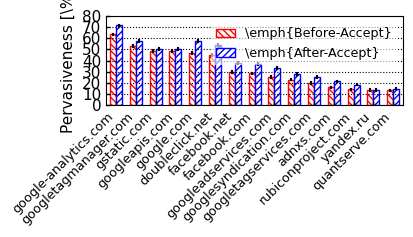

In [27]:
occ = Counter()
this_grouped = grouped [ grouped[["us"]].any(axis=1) ] 
# this_grouped = this_grouped [ this_grouped['News_and_Media']==True ]

for s in this_grouped["tp_first"].values:
    for t in s:
        occ[t] +=1

# for s in this_grouped["trackers_first"].values:
#     for t in s:
#         occ[t] +=1
        
monitor_tp = occ.most_common(15)

plot_data = []


for tp, _ in monitor_tp:
    tot = len(this_grouped.index)
    tp_first = len(this_grouped[this_grouped["tp_first"].apply(lambda s: tp in s) ].index)
    tp_click = len(this_grouped[this_grouped["tp_click"].apply(lambda s: tp in s) ].index)  
    
    tracker_first = len(this_grouped[this_grouped["trackers_first"].apply(lambda s: tp in s) ].index)
    tracker_click = len(this_grouped[this_grouped["trackers_click"].apply(lambda s: tp in s) ].index) 

    print("1:",tp_first)
    print("2:",tp_click)
    
    plot_data.append({"tp": tp,
                  BEFORE_STR : tp_first/tot*100,
                  AFTER_STR: tp_click/tot*100,
                  BEFORE_STR + " (Tracker)": tracker_first/tot*100,
                  AFTER_STR +" (Tracker)": tracker_click/tot*100,    
                  # BEFORE_STR : tracker_first/tot*100,
                  # AFTER_STR: tracker_click/tot*100,
                 })
    
plot_df = pd.DataFrame(plot_data)
plot_df["tp"] = plot_df["tp"].replace("google.it","google.*")
plot_df.index = plot_df["tp"]
del plot_df["tp"]
plot = fastplot.plot( plot_df [[BEFORE_STR, AFTER_STR] ] ,None, 
               mode='bars_multi', ylabel = 'Pervasiveness [\\%]', xticks_rotate = 45, 
               legend = True, legend_loc='upper right', legend_ncol=1, legend_fontsize = "small", xticks_fontsize="small",
                     legend_alpha=0.6,
               grid_axis="y", yticks = ([0,10,20,30,40,50,60,70,80], None),
               ylim = (0,80), **PLOT_ARGS)

for p in plot.gca().patches[:len(plot_df)] + [plot.gca().get_legend().get_patches()[0]]:
    p.set_hatch("\\\\\\\\\\")
    p.set_edgecolor ("red")
    p.set_facecolor ("white")
for p in plot.gca().patches[len(plot_df):]+ [plot.gca().get_legend().get_patches()[1]]:
    p.set_hatch("/////")
    p.set_edgecolor ("blue")
    p.set_facecolor ("white")
    
N=this_grouped["sld"].nunique()
# err = plot_df[[BEFORE_STR, AFTER_STR]].applymap(lambda v: [ e*100 for e in statsmodels.stats.proportion.proportion_confint(v*N/100,N,0.05) ])
err = plot_df[[BEFORE_STR, AFTER_STR]].map(lambda v: [ e*100 for e in statsmodels.stats.proportion.proportion_confint(v*N/100,N,0.05) ])
for i, tup in enumerate(err.itertuples()):
    plot.gca().plot( (i-0.15,i-0.15), (tup[1]), linestyle="-", color="black"  )
    plot.gca().plot( (i+0.15,i+0.15), (tup[2]), linestyle="-", color="black" )

plot.savefig("plots/cookieaccept_top_tp.pdf")
plot.show()
plot_df["increase"] = plot_df[AFTER_STR] - plot_df[BEFORE_STR]
